In [2]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import numpy as np

diabetes = datasets.load_diabetes(as_frame=True)
diabetes_df = diabetes.data.copy()
diabetes_df['target'] = diabetes.target
diabetes_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [3]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


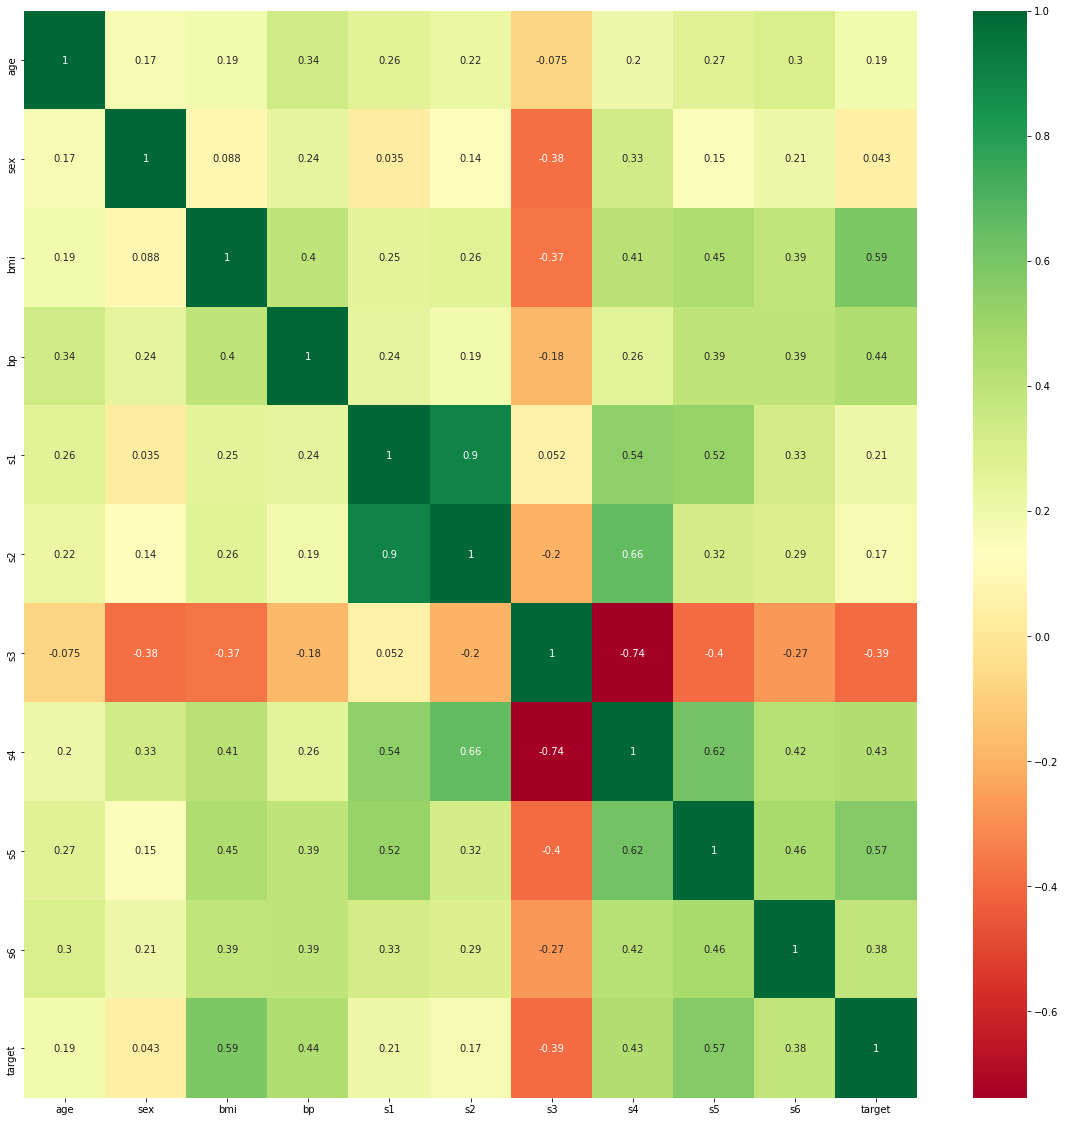

In [4]:
corrmat = diabetes_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(diabetes_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [5]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

selector = SelectKBest(f_regression, k=4)
##K Número de principais recursos a serem selecionados. A opção "todos" ignora a 
##seleção, para uso em uma pesquisa de parâmetros.
selector.fit(diabetes.data, diabetes.target)

feats = selector.get_support(True)
feats_name = diabetes.data.columns[feats]

# IMC, Pressão Arterial, hormônio, antiepiléptico
feats_name

Index(['bmi', 'bp', 's4', 's5'], dtype='object')

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score


# regression = Ridge(alpha=0.1)
regression = LinearRegression()

# data = diabetes.data[diabetes.data.columns[feats]]
data = diabetes.data

X_train, X_test, y_train, y_test = train_test_split(data, diabetes.target, test_size=0.10, random_state=13)

model = regression.fit(X_train, y_train)
score = model.score(X_test, y_test)
# r2 = r2_score(y_test, model.predict(X_test))

print("Score: {:.2f}".format(score))
# print("R2: {:.2f}".format(r2))

Score: 0.36


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

reg_dct = { 
        'Linear': LinearRegression(), 
        'Ridge': Ridge(alpha=0.1), 
        'RandomForest': RandomForestRegressor(n_estimators=10),
        'Lasso': Lasso(alpha=0.2),
        'ElasticNet': ElasticNet(alpha=0.02),
        'GradientBoosting': GradientBoostingRegressor(**params)}

# feats_name = ['bmi', 'bp', 's6']

data_df = diabetes_df.sample(frac=1)
X = data_df.drop(data_df.columns.difference(feats_name), axis=1)
y = data_df['target']

np.set_printoptions(precision=3)

for name, regression in reg_dct.items():
  scores = cross_val_score(regression, X, y, cv=10)
  print("{} Regression\nScores: {}\n".format(name, scores)) 

NameError: name 'np' is not defined

In [25]:
from sklearn.linear_model import LassoCV

# data_df = diabetes_df.sample(frac=1)
# X = data_df.drop(data_df.columns.difference(feats_name), axis=1)
# y = data_df['target']

X_train, X_test, y_train, y_test = train_test_split(data, diabetes.target, test_size=0.20, random_state=1)

reg = LassoCV(cv=10, random_state=1).fit(X_train, y_train)
reg.score(X_test, y_test)


0.4324641556218257

In [24]:
from sklearn import cluster

data_df = diabetes_df.sample(frac=1)
agglo = cluster.FeatureAgglomeration(n_clusters=4)

X = data_df.drop(['target', 'sex'], axis=1)

a = agglo.fit(X)
a

FeatureAgglomeration(n_clusters=4)

In [25]:
X_reduced = a.transform(X)
X_reduced.shape

(442, 4)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, diabetes.target, test_size=0.10)

model = regression.fit(X_train, y_train)
score = model.score(X_test, y_test)
r2 = r2_score(y_test, model.predict(X_test))

print("Score: {:.2f}\nR2: {:.2f}".format(score, r2))


Score: -0.08
R2: -0.08


In [37]:
from sklearn.neural_network import MLPRegressor

# data = diabetes.data[diabetes.data.columns[feats]]
data = diabetes.data.drop(diabetes.data.columns.difference(feats_name), axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, diabetes.target, test_size=0.20, random_state=1)


regr = MLPRegressor(solver='lbfgs', random_state=1, max_iter=1000).fit(X_train, y_train)

regr.score(X_test, y_test)

0.35118633261624255

In [17]:
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

regr = GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
score = regr.score(X_test, y_test)

print("Score: {:.4f}".format(score))

mse = mean_squared_error(y_test, regr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Score: 0.4169
The mean squared error (MSE) on test set: 3036.3949
